In [3]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
# import warning.ignore

In [4]:
file_path = r'C:\Users\hp\Downloads\PropsThreeFinal.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Peptide                      7240 non-null   object 
 1   LogP                         7240 non-null   float64
 2   Molecular Weight             7240 non-null   float64
 3   Number Of Atoms              7240 non-null   int64  
 4   QED SCORE                    7240 non-null   float64
 5   IsoElectric Point            7240 non-null   float64
 6   MolarExtinction Coefficient  7240 non-null   int64  
 7   HydrogenBond                 7240 non-null   int64  
 8   Affinity                     7240 non-null   float64
 9   BBB_Prediction               7240 non-null   int64  
 10  Hydrophobicity               7240 non-null   float64
 11  Lipophilicity                7240 non-null   float64
 12  Toxicity                     7240 non-null   float64
dtypes: float64(8), int

In [9]:
df= df.dropna()

In [5]:
df.columns

Index(['Peptide', 'LogP', 'Molecular Weight', 'Number Of Atoms', 'QED SCORE',
       'IsoElectric Point', 'MolarExtinction Coefficient', 'HydrogenBond',
       'Affinity', 'BBB_Prediction', 'Hydrophobicity', 'Lipophilicity',
       'Toxicity'],
      dtype='object')

In [10]:
anomaly_inputs = ['HydrogenBond','Affinity']



In [11]:
model_IF = IsolationForest(contamination = 0.1, random_state = 42)


In [12]:
model_IF.fit(df[anomaly_inputs])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [14]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [15]:
df.loc[:,['HydrogenBond','Affinity','anomaly_scores','anomaly']]


HydrogenBond  Affinity  anomaly_scores  anomaly
0                8      -6.9        0.118940        1
1               14      -7.9        0.139712        1
2               14      -6.9        0.127333        1
3               10      -7.0        0.139400        1
4                8      -6.7        0.109279        1
...            ...       ...             ...      ...
7235             5      -6.8        0.033581        1
7236             8      -7.3        0.126487        1
7237            16      -8.5        0.098697        1
7238            20      -8.6        0.069946        1
7239             6      -7.3        0.070374        1

[7240 rows x 4 columns]

In [39]:
def outlier_plot(data, outlier_method_name, x_var, y_var, xaxis_limits=[0, 1], yaxis_limits=[0, 1]):
    print(f'Outlier Method : {outlier_method_name}')
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly'] == -1])}")
    print(f"Number of non-anomalous values {len(data[data['anomaly'] == 1])}")
    print(f"Total Number of Values: {len(data)}")
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1, -1])
    g.map(sns.scatterplot, x_var, y_var)
#     g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
#     g.set_axis_labels(x_var, y_var)  # Adding axis labels
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly'] == -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly'] == 1])} points")
    return g


Outlier Method : Isolation Forest
Number of anomalous values 748
Number of non-anomalous values 6492
Total Number of Values: 7240


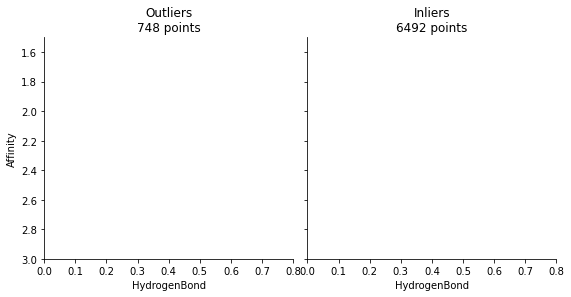

In [40]:
outlier_plot(df,"Isolation Forest","HydrogenBond","Affinity",[0,0.8],[3,1.5])

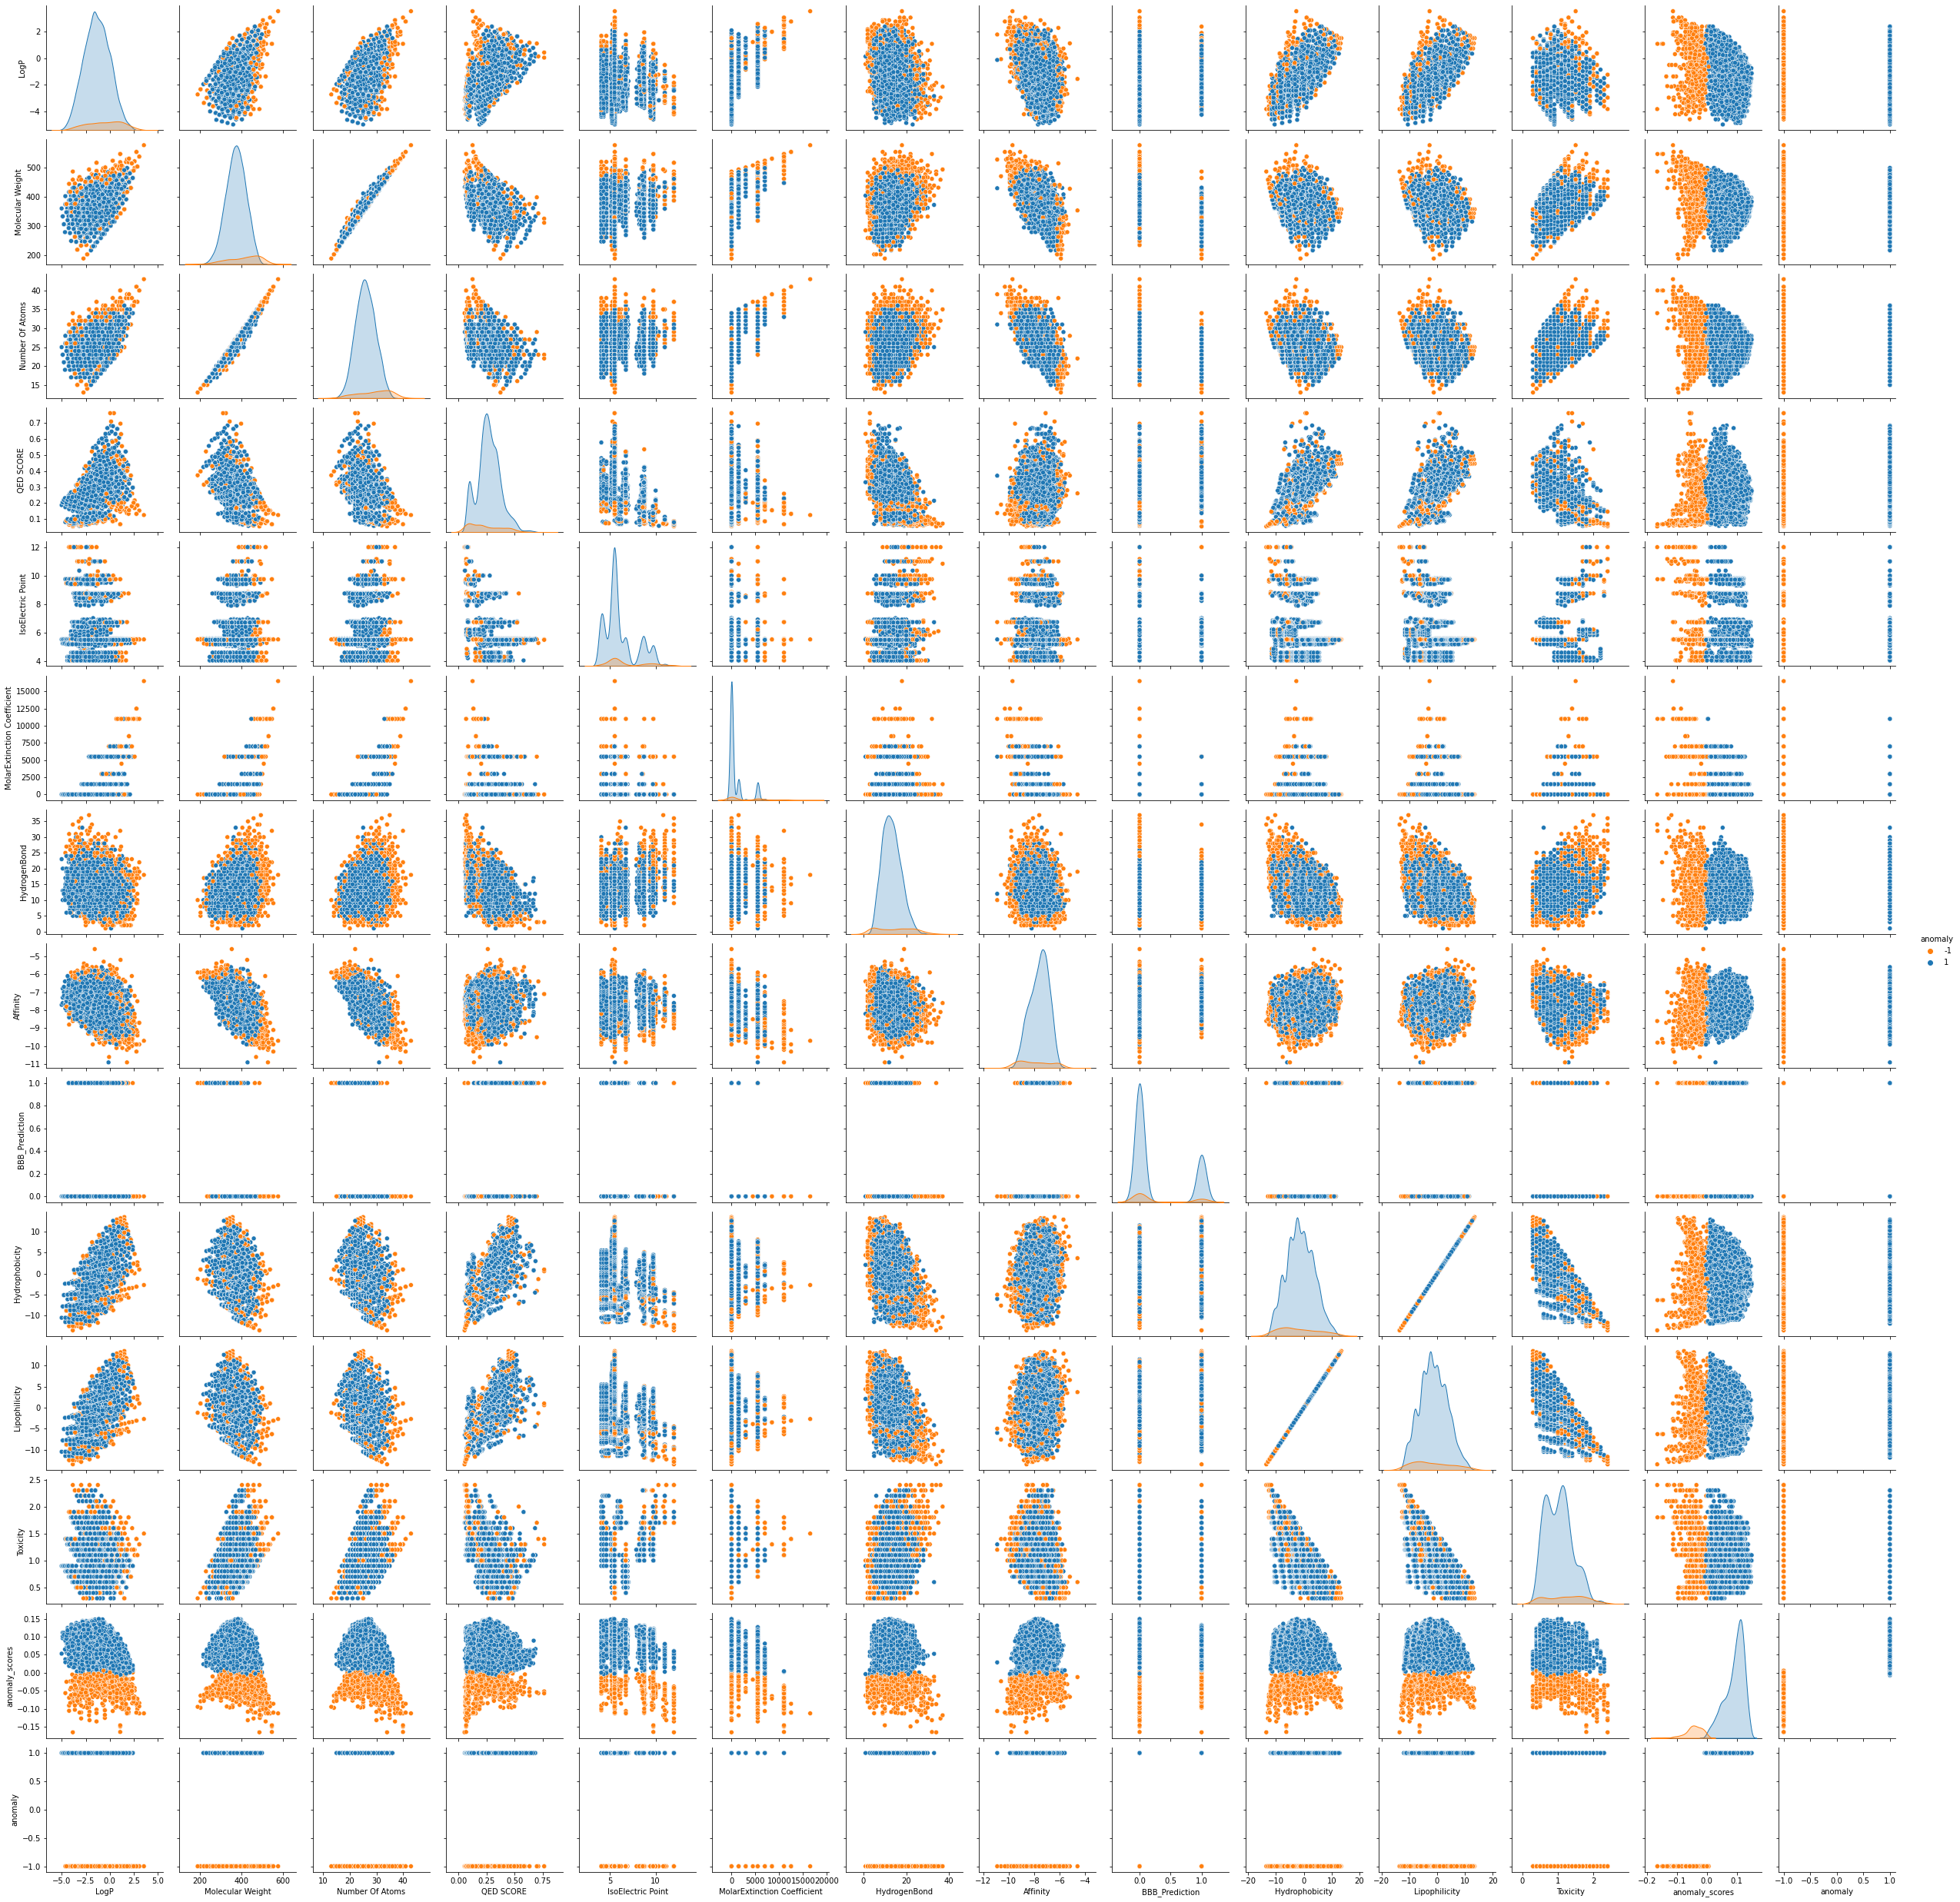

In [42]:
palette = ['#ff7f0e','#1f77b4']
sns.pairplot(df,vars=anomaly_inputs,hue='anomaly',palette = palette)

In [ ]:
# Building an Isolation Forest Model Using Multiple Features

In [28]:
df.columns

Index(['Peptide', 'LogP', 'Molecular Weight', 'Number Of Atoms', 'QED SCORE',
       'IsoElectric Point', 'MolarExtinction Coefficient', 'HydrogenBond',
       'Affinity', 'BBB_Prediction', 'Hydrophobicity', 'Lipophilicity',
       'Toxicity', 'anomaly_scores', 'anomaly'],
      dtype='object')

In [31]:
anomaly_inputs = [ 'LogP', 'Molecular Weight', 'Number Of Atoms', 'QED SCORE',
       'IsoElectric Point', 'MolarExtinction Coefficient', 'HydrogenBond',
       'Affinity', 'BBB_Prediction', 'Hydrophobicity', 'Lipophilicity',
       'Toxicity', 'anomaly_scores', 'anomaly']

In [86]:
model_IF = IsolationForest(contamination=0.1,random_state = 42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method : isolation Forest
Number of anomalous values 463
Number of non-anomalous values 6666
Total Number of Values: 7129


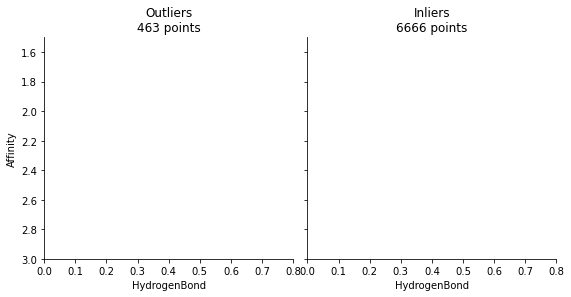

In [87]:
outlier_plot(df,'isolation Forest','HydrogenBond','Affinity'
            ,[0,0.8],[3,1.5]);

In [88]:
palette = ['#ff7f0e','#1f77b4']
sns.pairplot(df,vars=anomaly_inputs,hue='anomaly',palette = palette)

In [62]:
# data = df.drop(df[df['anomaly']] == -1)
data = df[df['anomaly']==1]
data.shape
data

Peptide     LogP  Molecular Weight  Number Of Atoms  QED SCORE  \
6        AAQ -2.32680           288.304               20   0.335919   
24       ARC -2.41913           348.429               23   0.093413   
25       ARE -2.48413           374.398               26   0.102647   
29       ARI -1.30283           358.443               25   0.135830   
32       ARM -1.59583           376.483               25   0.120622   
...      ...      ...               ...              ...        ...   
7214     VYS -1.03550           367.402               26   0.324784   
7216     VYT -0.64700           381.429               27   0.331093   
7222     VVN -1.44470           330.385               23   0.346990   
7225     VVE -0.45530           345.396               24   0.358185   
7226     VVQ -1.05460           344.412               24   0.338917   

      IsoElectric Point  MolarExtinction Coefficient  HydrogenBond  Affinity  \
6              5.570017                            0            11      -7.0   
24             8.294712                            0            13      -6.9   
25             6.262713                            0            14      -8.1   
29             9.795020                            0            16      -7.6   
32             9.795020                            0            14      -7.4   
...                 ...                          ...           ...       ...   
7214           5.494364                         1490            16      -7.6   
7216           5.494364                         1490            15      -7.5   
7222           5.494989                            0            10      -7.3   
7225           4.598695                            0             9      -7.5   
7226           5.494989                            0             9      -7.2   

      BBB_Prediction  Hydrophobicity  Lipophilicity  Toxicity  anomaly_scores  \
6                  1             0.1            0.1       0.6        0.024258   
24                 0            -0.2           -0.2       1.1        0.021754   
25                 0            -6.2           -6.2       1.7        0.014977   
29                 0             1.8            1.8       1.1        0.024811   
32                 0            -0.8           -0.8       1.2        0.029405   
...              ...             ...            ...       ...             ...   
7214               0             2.1            2.1       0.9        0.040342   
7216               0             2.2            2.2       0.9        0.035975   
7222               0             4.9            4.9       0.7        0.034801   
7225               1             4.9            4.9       1.1        0.015912   
7226               0             4.9            4.9       0.6        0.034956   

      anomaly  
6           1  
24          1  
25          1  
29          1  
32          1  
...       ...  
7214        1  
7216        1  
7222        1  
7225        1  
7226        1  

[2735 rows x 15 columns]

In [63]:
data.columns

Index(['Peptide', 'LogP', 'Molecular Weight', 'Number Of Atoms', 'QED SCORE',
       'IsoElectric Point', 'MolarExtinction Coefficient', 'HydrogenBond',
       'Affinity', 'BBB_Prediction', 'Hydrophobicity', 'Lipophilicity',
       'Toxicity', 'anomaly_scores', 'anomaly'],
      dtype='object')

In [ ]:
import 

In [47]:
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


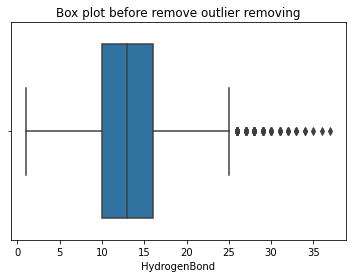

In [48]:
from matplotlib import pyplot as plt
sns.boxplot(df['HydrogenBond'])
plt.title("Box plot before remove outlier removing")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


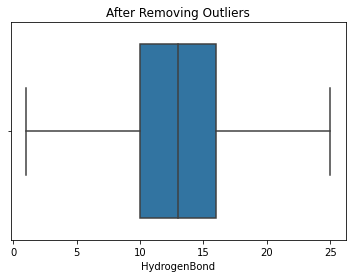

In [49]:
def drop_outliers(df, field_name):
    q1 = np.percentile(df[field_name], 25)
    q3 = np.percentile(df[field_name], 75)
    iqr = 1.5 * (q3 - q1)
    df.drop(df[(df[field_name] > (q3 + iqr)) | (df[field_name] < (q1 - iqr))].index, inplace=True)

# Assuming 'train' is your DataFrame
drop_outliers(df, 'HydrogenBond')

# Plotting the boxplot after removing outliers
sns.boxplot(df['HydrogenBond'])
plt.title("After Removing Outliers")
plt.show()


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [95]:
# Assuming 'df' is your DataFrame containing the dataset
X = df.drop(['Peptide', 'anomaly'], axis=1)  # Features (excluding 'Peptide' and 'anomaly')
y = df['anomaly']  # Target variable 'anomaly'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [97]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

          -1       0.85      0.27      0.41       103
           1       0.95      1.00      0.97      1323

    accuracy                           0.94      1426
   macro avg       0.90      0.63      0.69      1426
weighted avg       0.94      0.94      0.93      1426

Accuracy: 0.9438990182328191


In [68]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score

# # Assuming 'df' is your DataFrame containing the dataset
# X = df.drop(['Peptide', 'anomaly'], axis=1)  # Features (excluding 'Peptide' and 'anomaly')
# y = df['anomaly']  # Target variable 'anomaly'

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Logistic Regression model
# model = LogisticRegression(random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)
# print("Classification Report:\n", report)
# print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

          -1       0.72      0.82      0.77       880
           1       0.63      0.49      0.55       546

    accuracy                           0.70      1426
   macro avg       0.68      0.66      0.66      1426
weighted avg       0.69      0.70      0.69      1426

Accuracy: 0.6956521739130435


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
